# Energy Compaction Properties of Transforms

# Raj Prabhu - 15IE33001

In [1]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math

In [2]:
def generalised_transform(transform_type,x):
    N=len(x)
    if transform_type==0:
        gtm=dft(N)
    if transform_type==1:
        gtm=dcft(N)
    if transform_type==2:
        gtm=haar(N)
    return gtm*x  

In [3]:
def generalised_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=idft(N)
    if transform_type==1:
        igtm=idcft(N)
    if transform_type==2:
        igtm=ihaar(N)
    return igtm*X

## DFT and IDFT Matrices

In [4]:
def dft(N):#returns dft matrix
    dft_matrix=np.empty([N,N],dtype=np.complex_)
    dft_matrix=np.matrix(dft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dft_matrix[k,n]=np.exp(-(1j)*2*np.pi*k*n/N)
        
    return dft_matrix

In [5]:
def idft(N):#returns dft matrix
    idft_matrix=np.empty([N,N],dtype=np.complex_)
    idft_matrix=np.matrix(idft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            idft_matrix[k,n]=np.exp((1j)*2*np.pi*k*n/N)
    idft_matrix=idft_matrix/N        
    return idft_matrix

## DCT and IDCT Matrices

In [6]:
def dcft(N):#returns dcft matrix
    dcft_matrix=np.empty([N,N],dtype=np.complex_)
    dcft_matrix=np.matrix(dcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dcft_matrix[k,n]=2*np.cos(np.pi*k*(2*n+1)/(2*N))
        
    return dcft_matrix

In [7]:
def idcft(N):#returns dcft matrix
    idcft_matrix=np.empty([N,N],dtype=np.complex_)
    idcft_matrix=np.matrix(idcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices: 
        for n in indices:
            if n==0:
                alpha=0.5
            else:
                alpha=1
            idcft_matrix[k,n]=alpha*np.cos(np.pi*n*(2*k+1)/(2*N))
    idcft_matrix=idcft_matrix/N
    return idcft_matrix

## Haar and Inverse Haar Matrices

In [49]:
def haar(N):
    if N==2:
        h2=np.matrix([[1,1],[1,-1]])
        return h2
    v=np.log2(N)-1
    hn2=haar(N/2)
    result1=np.concatenate((hn2,hn2),axis=1)
    matrix1=(pow(2,v/2))*np.identity(int(N/2))
    result2=np.concatenate((matrix1,-matrix1),axis=1)
    return np.concatenate((result1,result2),axis=0)

In [9]:
def ihaar(N):
    haar_matrix=haar(N)
    return np.transpose(haar_matrix)/N

### Other functions

In [10]:
def mse(transform_type,x,X,N):
    err=[]
    for l in range(0,N,1):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=generalised_inverse_transform(0,Xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(2,Xm)
        err=np.append(err,dot_product(x,xm,N))
    return err 

In [11]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N

In [12]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X

In [13]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X  

In [53]:
# input sequence generator
length=64
real=np.random.rand(length)
img=np.random.rand(length)
x=real+1j*img
x=np.matrix(x)
x=np.transpose(x)
color=['r','g','b']
for i in range(0,3,1):
    X=generalised_transform(i,x)
    print(X)
    err=mse(i,x,X,length)
    print(err.shape)

[[33.43876804+30.76256598j]
 [ 2.82562138 -0.24199066j]
 [ 1.80246603 -4.19593979j]
 [ 0.53748097 +2.65873598j]
 [ 2.48198076 +2.54264829j]
 [ 6.02487449 -3.63206267j]
 [ 3.32018721 +2.66477648j]
 [ 0.88403404 -1.74339002j]
 [ 2.78894883 +2.79011785j]
 [-0.73081974 +1.56495428j]
 [-3.25629643 -4.28890494j]
 [ 0.58766286 +0.4773076j ]
 [-1.87089798 +1.46095986j]
 [-0.38702256 +0.7913353j ]
 [-2.703012   -1.60908313j]
 [-2.53980159 +0.43872861j]
 [ 1.12303333 +5.37572303j]
 [-2.16389898 -0.90324687j]
 [ 0.68643086 +1.49629944j]
 [ 1.42816392 -4.45082615j]
 [ 0.87085498 +3.9166049j ]
 [-1.5887814  +3.62190638j]
 [-0.94566255 -0.85757843j]
 [ 0.07740971 +1.73544071j]
 [ 2.37670461 -0.32899091j]
 [-2.16353892 +1.08640169j]
 [-0.8813916  +0.45091068j]
 [-4.5063674  +1.21674372j]
 [ 0.92557091 -0.2041397j ]
 [-0.36458822 +4.661747j  ]
 [-3.39747394 -0.57445352j]
 [ 1.71897539 +0.55579679j]
 [-2.8983728  +0.77578324j]
 [-0.77908914 +2.20955932j]
 [ 5.36434177 +1.0816734j ]
 [ 3.99724942 +3.926

## Graph - E(L) vs L

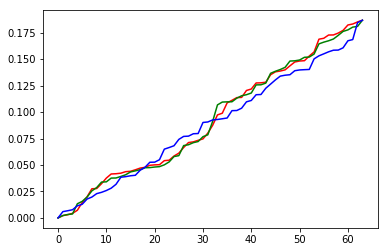

In [54]:
for i in range(0,3,1):
    X=generalised_transform(i,x)
    err=mse(i,x,X,length)
    plt.plot(np.arange(0,length,1),err,color[i])